# Results from prediction of positions

## Things to explore for Deep Regression
arXiv:1803.08450v2 "A Comprehensive Analysis of Deep Regression"
* Loss functions
* Target and input representation
* Convolution blocks - complexity of network
* Fine-Tuning (ref. article, on pretrained networks)
* Regression layer placement


Group by distance to check if there are some events that are dominating the results.
Also for relative energies.


In [10]:
# Imports
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
from master_data_functions.functions import *
from analysis_functions.functions import *
from keras import backend
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Load data
DATA_PATH = "../../data/simulated/"
OUTPUT_PATH = "../../data/output/"
MODEL_PATH = OUTPUT_PATH + "models/"


# Images are not normalized, positions are normalized (div by 16) to [0,1] interval
images = np.load(DATA_PATH + "test_images_double_1M.npy")
positions = np.load(DATA_PATH + "test_positions_double_1M.npy")

# shape is (x1, y1, x2, y2)
y_pred = np.load(DATA_PATH + "test_y_pred_double_1M.npy")

print("Images shape: {}".format(images.shape))
print("Positions shape: {}".format(positions.shape))
print("Predictions shape: {}".format(y_pred.shape))

Images shape: (100000, 16, 16, 1)
Positions shape: (100000, 4)
Predictions shape: (100000, 4)


## Residuals and R2 Score

In [28]:
y_resid = positions - y_pred

print("X1 residuals mean: {:g}".format(np.mean(y_resid[:,0])))
print("Y1 residuals mean: {:g}".format(np.mean(y_resid[:,1])))
print("X2 residuals mean: {:g}".format(np.mean(y_resid[:,2])))
print("Y2 residuals mean: {:g}".format(np.mean(y_resid[:,3])))
print("Mean all residuals: {:g}".format(np.mean(y_resid)))

rel_dist = relative_distance(positions)

print("R2-score:", r2_score(positions, y_pred))

X1 residuals mean: -0.0143292
Y1 residuals mean: 0.00547666
X2 residuals mean: -0.0281515
Y2 residuals mean: -0.0123447
Mean all residuals: -0.0123372
R2-score: 0.36045570954424655


## Comparing true positions and predictions
Looking at where the model predicts positions compared with
how the positions are actually distributed may reveal information
about what the model is doing wrong.

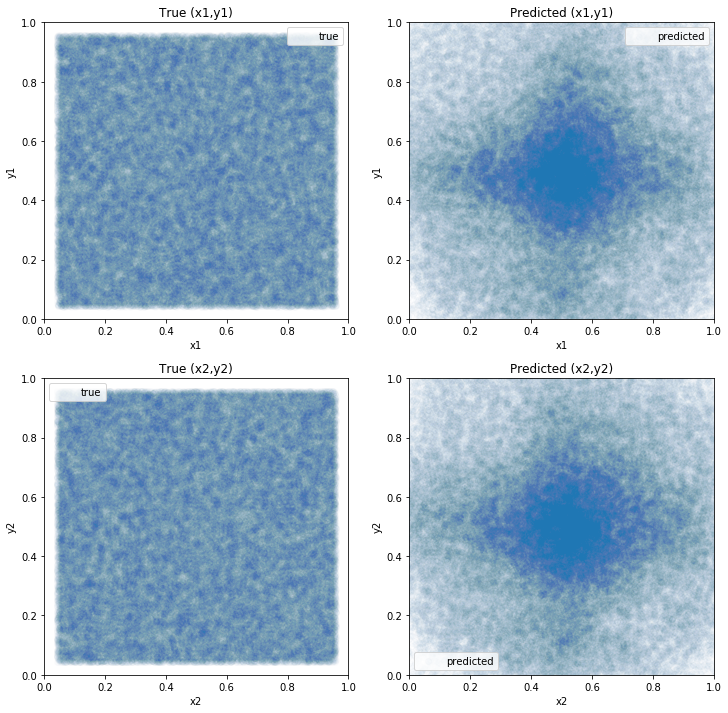

In [25]:
# Scatterplot predicted positions x1,y1 and target positions
fig, ax = plt.subplots(2,2, figsize=(12,12))
ax[0,0].scatter(positions[:,0], positions[:,1], alpha=0.01, label="true")
ax[0,0].set_title("True (x1,y1)")
ax[0,0].set_xlabel("x1")
ax[0,0].set_ylabel("y1")
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(0,1)
ax[0,0].legend()

ax[0,1].scatter(y_pred[:,0], y_pred[:,1], alpha=0.01, label="predicted")
ax[0,1].set_title("Predicted (x1,y1)")
ax[0,1].set_xlabel("x1")
ax[0,1].set_ylabel("y1")
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(0,1)
ax[0,1].legend()

ax[1,0].scatter(positions[:,2], positions[:,3], alpha=0.01, label="true")
ax[1,0].set_title("True (x2,y2)")
ax[1,0].set_xlabel("x2")
ax[1,0].set_ylabel("y2")
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,1)
ax[1,0].legend()

ax[1,1].scatter(y_pred[:,2], y_pred[:,3], alpha=0.01, label="predicted")
ax[1,1].set_title("Predicted (x2,y2)")
ax[1,1].set_xlabel("x2")
ax[1,1].set_ylabel("y2")
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0,1)
ax[1,1].legend()
plt.show()
